# Trabalho Final - Tópicos Especiais em Computação I

In [62]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime, timedelta
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from analise_data_ru import ROOT_PATH

In [5]:
import warnings

from sklearn.preprocessing import StandardScaler, MinMaxScaler
warnings.simplefilter(action='ignore', category=FutureWarning)

## Obtain(Obter)
### Nesta etapa, os cientistas de dados identificam as fontes de dados relevantes para o projeto. Isso pode envolver a coleta de dados brutos de várias fontes, como bancos de dados, APIs, arquivos CSV, textos da web, entre outros. É importante considerar as questões de privacidade e ética ao obter os dados necessários para o projeto.
### No nosso caso o dataset utilizado é referente a quantidade de refeições no Restaurante Universitário do Campus Sobral.

In [7]:
df = pd.read_csv(ROOT_PATH / 'data' / 'raw' / 'data_ru.csv', delimiter=";")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1095 non-null   object
 1   lunch   1095 non-null   int64 
 2   dinner  1095 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 25.8+ KB


In [9]:
df.head()

,date,lunch,dinner
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


In [10]:
# Renomeia as colunas da base de dados "parte1"
df = df.rename(columns={'date': 'Data', 'lunch': 'Qt_almoco', 'dinner': 'Qt_jantar'})
# Exibe as primeiras 5 linhas da base de dados "parte1" após a renomeação das colunas
df.head()


,Data,Qt_almoco,Qt_jantar
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


In [11]:
df

,Data,Qt_almoco,Qt_jantar
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218
...,...,...,...
1090,2020-03-25,0,0
1091,2020-03-26,11,13
1092,2020-03-27,15,14
1093,2020-03-30,13,12


É possível perceber que na base de dados final possui linhas onde ambas as colunas "Qt_almoco" e "Qt_jantar" possuem valor igual à 0, podendo assim serem removidas, uma vez que se tratam de dias onde o RU não serviu nenhuma refeição. Com isso devemos partir para o próximo passo.

## Scrub(Preparar)
### Após a obtenção dos dados, eles precisam ser preparados para análise. Isso inclui a limpeza dos dados, removendo valores ausentes, tratando outliers e lidando com quaisquer problemas de qualidade dos dados. Além disso, pode envolver a seleção das variáveis relevantes para o projeto e a transformação dos dados em um formato adequado para a análise.

In [12]:
# Laço de repetição que irá percorrer todas as linhas do nosso dataset
for i in range(len(df)):
  # Condição caso tanto a coluna "Qt_almoco" quanto a "Qt_jantar" tenham valor igual a 0
  if(df['Qt_almoco'][i] == 0 & df["Qt_jantar"][i] == 0):
    # Caso ambas as colunas sejam possuam valor 0, a linha será removida
    df.drop(i, inplace=True)

# Uma vez removida todas as linhas, é preciso resetar o index para corresponder ao novo número de linhas da base final
df = df.reset_index(drop=True)

# Exibindo a base final depois de todas as modificações
df

# Gerando uma copia da base_final para uso posterior
df_copia = df.copy()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Data       989 non-null    object
 1   Qt_almoco  989 non-null    int64 
 2   Qt_jantar  989 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 23.3+ KB


In [14]:
df.shape

(989, 3)

## Explore(Explorar)

Nesta etapa, os cientistas de dados exploram os dados por meio de análises estatísticas e visualizações. Eles procuram padrões, tendências e insights preliminares nos dados. Isso pode envolver a aplicação de técnicas de visualização de dados, como gráficos, histogramas e diagramas de dispersão, bem como a execução de análises estatísticas descritivas para resumir os dados.

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Qt_almoco,989.0,575.455005,275.155269,9.0,282.0,672.0,791.0,1033.0
Qt_jantar,989.0,341.238625,213.154835,0.0,127.0,412.0,512.0,714.0


A tabela acima mostra algumas informações como por exemplo a média dos valores de cada coluna,a quantidade, valores mínimos e máximos e os quartis

Observando a tabela acima podemos concluir que:


*   A média de almoço é maior que a de janta, ou seja, os estudantes vão mais para almoçar do que jantar.




### Plotando gráfico Boxplot para melhor visualização

<function matplotlib.pyplot.show(close=None, block=None)>

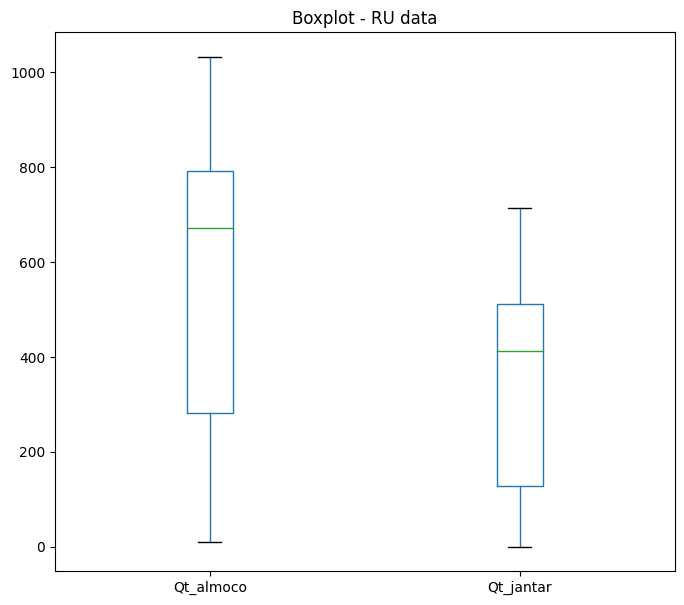

In [16]:
df.boxplot(grid=False,figsize=(8,7))
plt.title("Boxplot - RU data")
plt.show

Pelo gráfico acima podemos afirmar que o Restaurante Universitário é mais utilizado durante o dia do que a noite.

### Plotando histograma para visualizar a distribuição dos dados


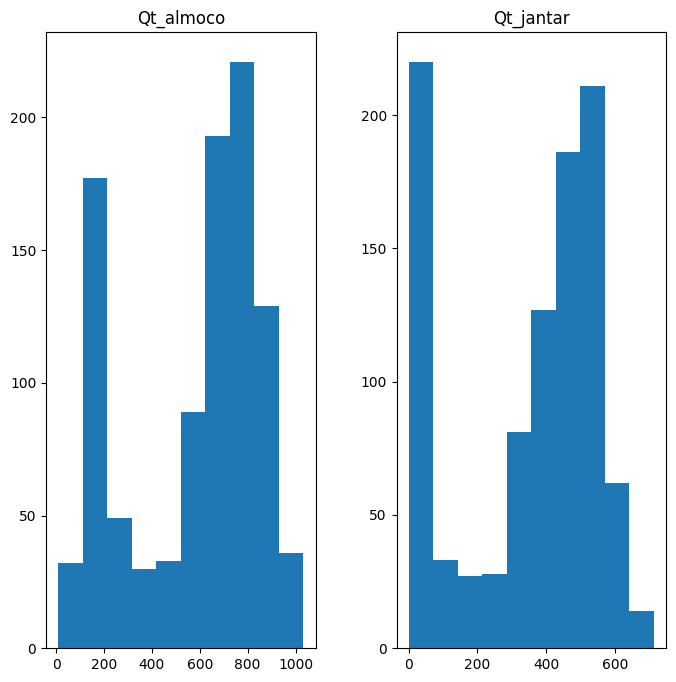

In [17]:
df.hist(grid=False,figsize=(8,8))
plt.show()

Primeiramente o que se conclui pelo histogrma é que os dados não seguem a distribuição normal.

## Model(Modelagem)

Uma vez que os dados tenham sido explorados, é possível construir modelos estatísticos ou algoritmos de aprendizado de máquina para fazer previsões ou tomar decisões. Essa etapa envolve a seleção e construção de modelos apropriados para o problema em questão, bem como a avaliação e otimização desses modelos. Para esse DataSet será utilizadoRegrssão Linear e Floresta Aleatória.

### Análise Quantidade de Almoço utilizando Regressão Linear e Floresta Aleatória

In [18]:
df.Data = pd.to_datetime(df.Data) # Convertendo a coluna Data para o formata de data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data       989 non-null    datetime64[ns]
 1   Qt_almoco  989 non-null    int64         
 2   Qt_jantar  989 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 23.3 KB


In [19]:
df['ano'] = df.Data.dt.year
df['mes'] = df.Data.dt.month
df['dia'] = df.Data.dt.dayofweek

df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Data,989,2018-02-18 23:58:32.639029248,2016-01-04 00:00:00,2017-02-02 00:00:00,2018-02-23 00:00:00,2019-03-15 00:00:00,2020-03-31 00:00:00,NaN
Qt_almoco,989.0,575.455005,9.0,282.0,672.0,791.0,1033.0,275.155269
Qt_jantar,989.0,341.238625,0.0,127.0,412.0,512.0,714.0,213.154835
ano,989.0,2017.659252,2016.0,2017.0,2018.0,2019.0,2020.0,1.227291
mes,989.0,6.240647,1.0,3.0,6.0,9.0,12.0,3.405569
dia,989.0,1.980789,0.0,1.0,2.0,3.0,4.0,1.411576


### Matriz de Correlação

O coeficiente de correlação é uma medida de associação entre duas variáveis e situa-se entre -1 e 1 sendo que -1 indica associação negativa perfeita e 1 indica associação positiva perfeita

In [20]:
df.corr()

,Data,Qt_almoco,Qt_jantar,ano,mes,dia
Data,1.000000,0.046296,0.004569,0.973118,0.073969,0.003640
Qt_almoco,0.046296,1.000000,0.970681,-0.023896,0.301487,-0.089731
Qt_jantar,0.004569,0.970681,1.000000,-0.068898,0.316817,-0.180785
ano,0.973118,-0.023896,-0.068898,1.000000,-0.156897,0.006734
mes,0.073969,0.301487,0.316817,-0.156897,1.000000,-0.013776
dia,0.003640,-0.089731,-0.180785,0.006734,-0.013776,1.000000


Estimar um modelo de Machine Learing utilizando a técnica de Regresão Linear para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre a quantidade de almoco e jantar (Y's). NO final do projeto teremos um modelo de previsão para o consumo médio de almoço segundo os inputs de da variável X.

In [21]:
df.shape

(989, 6)

### Comportamento da Variável Dependente(Y)

In [22]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

In [23]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_title('Quantidade de Almoços',fontsize=20)
ax.set_ylabel('Quantidade', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = df['Qt_almoco'].plot(fontsize=14)

Modelos de regressão linear assumem, inicialmente, que a variável dependente segue uma distribuição normal.

In [24]:
sns.boxplot(data=df['Qt_almoco'])
ax = sns.boxplot(data=df['Qt_almoco'], orient='v', width=0.2)
ax.set_title('Quantidade de Almoços',fontsize=20)
ax.set_ylabel('Quantidade', fontsize=16)

Text(0, 0.5, 'Quantidade')

Plotando gráficos BoxPlot referentes aos dias da semanda, mês e ano.

In [25]:
ax = sns.boxplot(y='Qt_almoco', x='dia', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(10, 5)
ax.set_title('Quantidade Almoço', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=16)
ax.set_xlabel('Dia da Semana', fontsize=16)

Text(0.5, 0, 'Dia da Semana')

No gráfico acima :


*  0 = segunda-feira
*  1 = terça-feira
* 2 = quarta-feira
*  3 = quinta-feira
* 4 = sexta-feira



In [26]:
ax = sns.boxplot(y='Qt_almoco', x='mes', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Quantidade Almoço', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=16)
ax.set_xlabel('Mes', fontsize=16)

Text(0.5, 0, 'Mes')

In [27]:
ax = sns.boxplot(y='Qt_almoco', x='ano', data=df, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Quantidade Almoço', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=16)
ax.set_xlabel('Ano', fontsize=16)

Text(0.5, 0, 'Ano')

Distribuição de Frequências

In [28]:
ax = sns.distplot(df['Qt_almoco'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax.set_ylabel('Quantidade', fontsize=16)

/tmp/ipykernel_22703/1341703067.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df['Qt_almoco'])


Text(0, 0.5, 'Quantidade')

Análise gráfica de variáveis dependentes e variáveis explicativas.

In [29]:
ax = sns.pairplot(df)

/home/aizen/dev/comp-eng/analise_data_ru/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Dispersão entre as variáveis

In [30]:
ax = sns.pairplot(df, y_vars='Qt_almoco', x_vars=['ano', 'mes','dia'],kind='reg')
ax.figure.set_size_inches(14, 8)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)

/home/aizen/dev/comp-eng/analise_data_ru/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Dispersão entre as Variáveis')

In [31]:
ax = sns.jointplot(x="dia", y="Qt_almoco", data=df, kind='reg')
ax.fig.suptitle('Dispersão - Quantidade Almoço X Dia da Semana', fontsize=18, y=1.05)
ax.set_axis_labels("Quantidade Máxima", "Quantidade de Almoço", fontsize=14)
ax.figure.set_size_inches(12,6)

In [32]:
ax= sns.lmplot(x="dia", y="Qt_almoco", data=df)
ax.fig.suptitle('Reta de Regressao - Quantidade Almoco X Dia da Semna', fontsize=16, y=1.02)
ax.set_xlabels("Dia da Semana", fontsize=14)
ax.set_ylabels("Quantidade de Almoco", fontsize=14)
ax.figure.set_size_inches(12,6)

/home/aizen/dev/comp-eng/analise_data_ru/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


O objetivo é prever ou estimar o valor médio da variável dependente, tendo antes conhecido o valor das variáveis dependentes. Para tanto, utilizaremos o Scikit-learn, uma biblioteca especializada em machine learing que possui um ferramental completo para esse fim. Inicialmente, separaremos nossos dados em train e test para modelar nossa regressão e testá-la. Importaremos a função train_test_split do sckit-learn para executar esta tarefa. Precisaremos dividir o dataframe em series que contém a variável dependente e outro dataframe que contém as variáveis explicativas. Então criaremos:

In [33]:
y = df['Qt_almoco']

In [34]:
X = df[['ano', 'mes', 'dia','Qt_jantar']]
X

,ano,mes,dia,Qt_jantar
0,2016,1,0,294
1,2016,1,1,363
2,2016,1,2,401
3,2016,1,3,349
4,2016,1,4,218
...,...,...,...,...
984,2020,3,1,9
985,2020,3,3,13
986,2020,3,4,14
987,2020,3,0,12


Essa função possui como retorno uma lista de quatro itens, e precisamos atribuir a cada elemento da lista o conteúdo das variáveis. O primeiro item da lista é o x de treino, o segundo é o x de teste, depois y de treino e y de teste.

Configuraremos, ainda o test_size como 0.3,que se refere à quantidade de dados que usaremos para teste, então 30% dos dados serão selecionados de forma aleatória para a realização de testes do modelo, já o restante será para treino.

O próximo parâmetro é o random_state. Ao fixarmos um valor, por exempLo 2811, teremos um conjunto de treino e de teste idênticos.

##Regressão com a os dados do Jantar

In [44]:
base_final = df

### Usando Regressão Linear

In [45]:
base_final

,Data,Qt_almoco,Qt_jantar,ano,mes,dia
0,2016-01-04,364,294,2016,1,0
1,2016-01-05,489,363,2016,1,1
2,2016-01-06,522,401,2016,1,2
3,2016-01-07,514,349,2016,1,3
4,2016-01-08,409,218,2016,1,4
...,...,...,...,...,...,...
984,2020-03-24,10,9,2020,3,1
985,2020-03-26,11,13,2020,3,3
986,2020-03-27,15,14,2020,3,4
987,2020-03-30,13,12,2020,3,0


In [46]:
#renomeando algumas colunas
base_final = base_final.rename(columns={'dia': 'dia_semana'})

In [47]:
base_final['dia'] = base_final.index
base_final

,Data,Qt_almoco,Qt_jantar,ano,mes,dia_semana,dia
0,2016-01-04,364,294,2016,1,0,0
1,2016-01-05,489,363,2016,1,1,1
2,2016-01-06,522,401,2016,1,2,2
3,2016-01-07,514,349,2016,1,3,3
4,2016-01-08,409,218,2016,1,4,4
...,...,...,...,...,...,...,...
984,2020-03-24,10,9,2020,3,1,984
985,2020-03-26,11,13,2020,3,3,985
986,2020-03-27,15,14,2020,3,4,986
987,2020-03-30,13,12,2020,3,0,987


In [71]:
#alterando a ordem das colunas
base_final = base_final[['dia', 'Data', 'ano', 'mes', 'dia_semana', 'Qt_almoco', 'Qt_jantar']]
base_final

,dia,Data,ano,mes,dia_semana,Qt_almoco,Qt_jantar
0,0,2016-01-04,2016,1,0,364,294
1,1,2016-01-05,2016,1,1,489,363
2,2,2016-01-06,2016,1,2,522,401
3,3,2016-01-07,2016,1,3,514,349
4,4,2016-01-08,2016,1,4,409,218
...,...,...,...,...,...,...,...
984,984,2020-03-24,2020,3,1,10,9
985,985,2020-03-26,2020,3,3,11,13
986,986,2020-03-27,2020,3,4,15,14
987,987,2020-03-30,2020,3,0,13,12


In [73]:
base_final.to_csv(ROOT_PATH / 'data' / 'processed' / 'final_base.csv', sep=',', index=False)

In [74]:
plt.figure(figsize=(15,7))
plt.plot(base_final['dia'], base_final['Qt_jantar'])

In [75]:
y = base_final['Qt_jantar']
X = base_final[['dia', 'dia_semana', 'Qt_almoco']]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [77]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [78]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.95


In [79]:
y_predict = modelo.predict(X_test)

In [80]:
plt.figure(figsize=(14,7))
plt.scatter(X_train['Qt_almoco'], y_train)
plt.scatter(X_test['Qt_almoco'], y_predict, color='red')
plt.legend(['treino' , 'teste'])
plt.xlabel('Quantidade de almoço')
plt.ylabel('Quantidade de jantares')
plt.title('Quantidade de jantares tidos e previstos')

Text(0.5, 1.0, 'Quantidade de jantares tidos e previstos')

### Usando Floresta Aleatória

In [81]:
florestaAleatoriaFunction = RandomForestRegressor(n_estimators = 50, max_features = 'sqrt', max_depth = 2, random_state = 2811)

In [82]:
florestaAleatoriaFunction.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, max_features='sqrt', n_estimators=50,
                      random_state=2811)

In [83]:
y_pred = florestaAleatoriaFunction.predict(X_test)

In [84]:
r2_score(y_test,y_pred)

0.7962062437300714

In [85]:
plt.figure(figsize=(14,7))
plt.scatter(X_train['Qt_almoco'], y_train)
plt.scatter(X_test['Qt_almoco'], y_pred, color='red')
plt.legend(['treino' , 'teste'])
plt.xlabel('Quantidade de almoço')
plt.ylabel('Quantidade de jantares')
plt.title('Quantidade de jantares tidos e previstos')

Text(0.5, 1.0, 'Quantidade de jantares tidos e previstos')

# Séries temporais

Implementação Series Temporais. Analisando os dados do dataframe percebemos que a coluna Data é do tipo object e teremos que alterar para Datetime.

Como mais a frente faremos a analise dos dados referentes a almoço e jantar separadamente, criaremos dataframes para cada um antecipadamente pois precisaremos limpar novamente retirando os valores zero, como foi falado anteriormente so limpamos quando Qt_almoco e Qt_jantar eram zero pois teriam casos que Qt_almoco teria dados mas Qt_jantar não.